# CVMFS Publication statistics

This notebook contains the statistics gathered on the host *cvmfs-lhcbdev-test* (lxcvmfs94.cern.ch) in June 2019.
The test consisted on using https://gitlab.cern.ch/bcouturi/lbcvmfsdevusecase to generate 100 MiB transactions in files of various sizes (actually the file size is random following a gaussian distribution with sigma=10 bytes in this test).
We show below the publication time for a 100MiB transaction, which were measured AFTER the removal of the throttling system on the CEPH S3 interface.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy as np

In [2]:
file_size = [ 1000, 4000, 10000, 20000, 40000, 100000]
publish_time = [ 152, 39.62109955423477, 16.464788732394368, 12, 8.724545454545455, 8.014090909090909]
publish_variance = [256.80, 17.485685098705158, 2.2808853118712262, 0.6, 0.9727487701021127, 1.366331597006904]


Text(0,0.5,'time in s')

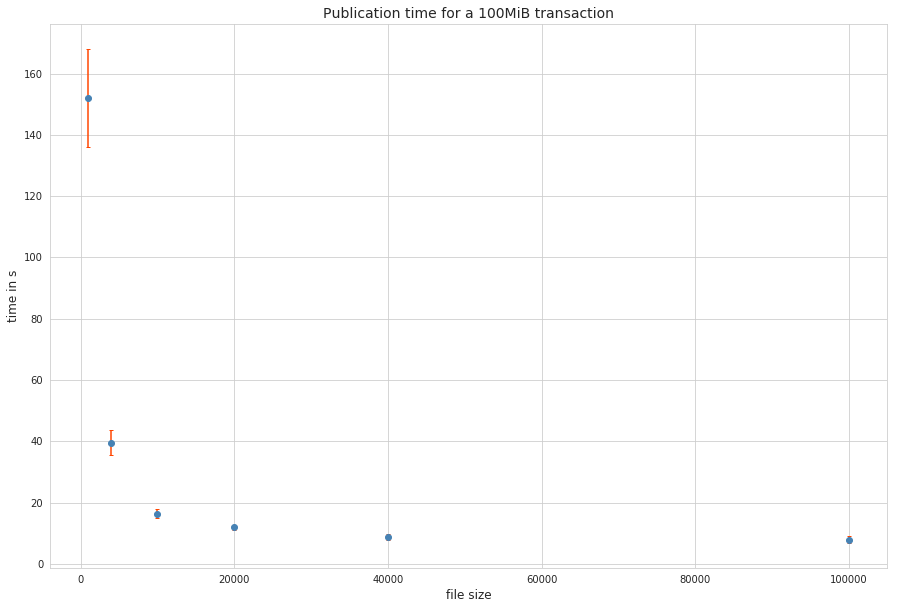

In [3]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the error bars
ax.errorbar(file_size, publish_time, yerr=np.sqrt(publish_variance), fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Publication time for a 100MiB transaction', fontsize=14)
ax.set_xlabel('file size', fontsize=12)
ax.set_ylabel('time in s', fontsize=12)


Text(0,0.5,'time in s')

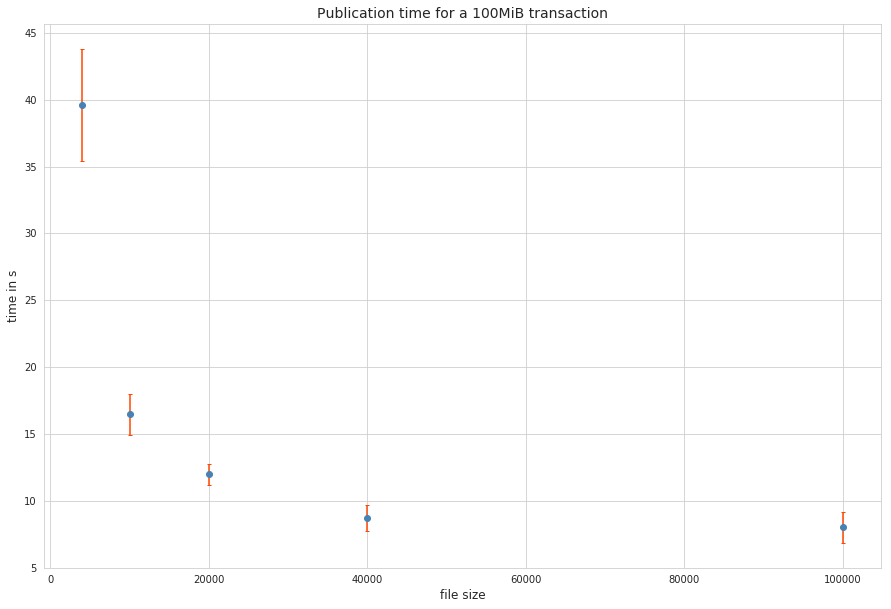

In [4]:
# A subplot without tiny files

fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the error bars
ax.errorbar(file_size[1:], publish_time[1:], yerr=np.sqrt(publish_variance[1:]), fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Publication time for a 100MiB transaction', fontsize=14)
ax.set_xlabel('file size', fontsize=12)
ax.set_ylabel('time in s', fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')



Text(0,0.5,'time in s')

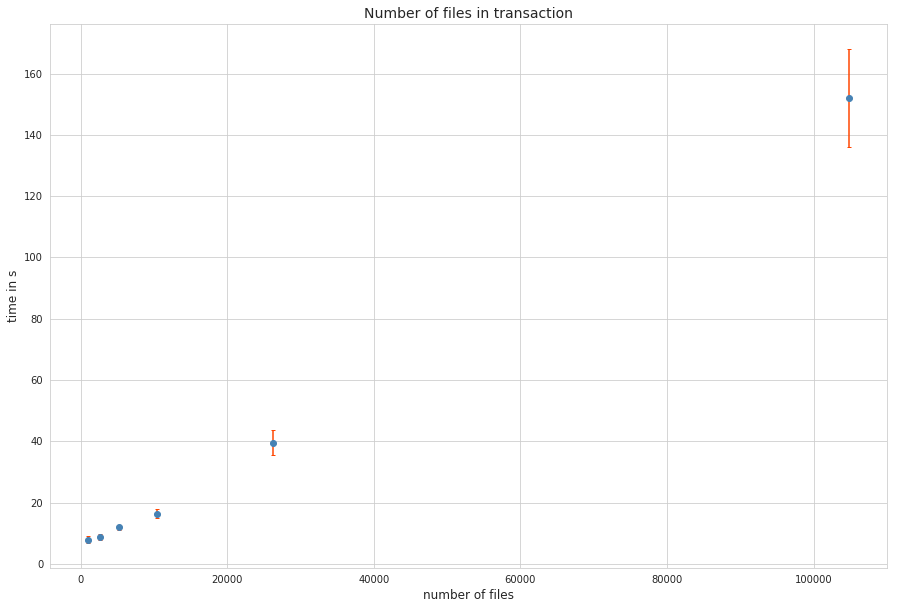

In [5]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the error bars
nbfiles = 100 * 1024 * 1024/ np.array(file_size)
ax.errorbar(nbfiles , publish_time, yerr=np.sqrt(publish_variance), fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Number of files in transaction', fontsize=14)
ax.set_xlabel('number of files', fontsize=12)
ax.set_ylabel('time in s', fontsize=12)


# LHCb Nightly slot statistics

In order to check how we will fare with the LHCb nightly build releases, we gather some statistics of the *lhcb-gaudi-head* nightly slot, one of the largest that should be representative.

In [6]:
import os
toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
filesizes=[]
for dirName, subdirList, fileList in os.walk(toppath):
    for f in fileList:
        full = os.path.join(dirName, f)
        if not os.path.islink(full):
            size = os.stat(full).st_size
            if size > 0:
                filesizes.append(size)

In [7]:
print("Number of files in the slot (for 10 days): %s" % len(filesizes))

Number of files in the slot (for 10 days): 4535694


In [8]:
s = np.array(filesizes)
sk = s/1024.0 # Size in KiB

In [9]:
import scipy.stats
scipy.stats.describe(sk)

DescribeResult(nobs=4535694, minmax=(0.0009765625, 380700.74609375), mean=66.9325211631409, variance=3136439.3005412114, skewness=72.0084792256107, kurtosis=8342.143016219048)

In [10]:
print("The median is %s KiB" % np.median(sk))

The median is 0.0400390625 KiB


In [43]:
hist, bin_edges = np.histogram(sk, bins=np.arange(0,100,1) )


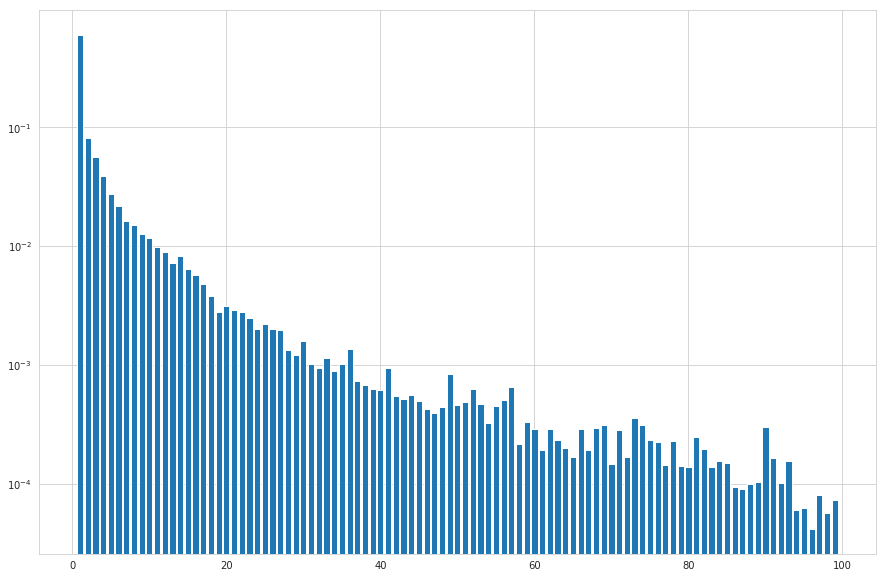

In [52]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
data = np.array(hist,dtype='f')/len(filesizes)
plt.bar(bin_edges[1:], data, log=True)
plt.show()

# Finding out why we have so many small files

Text(0.5,0,'file size in bytes')

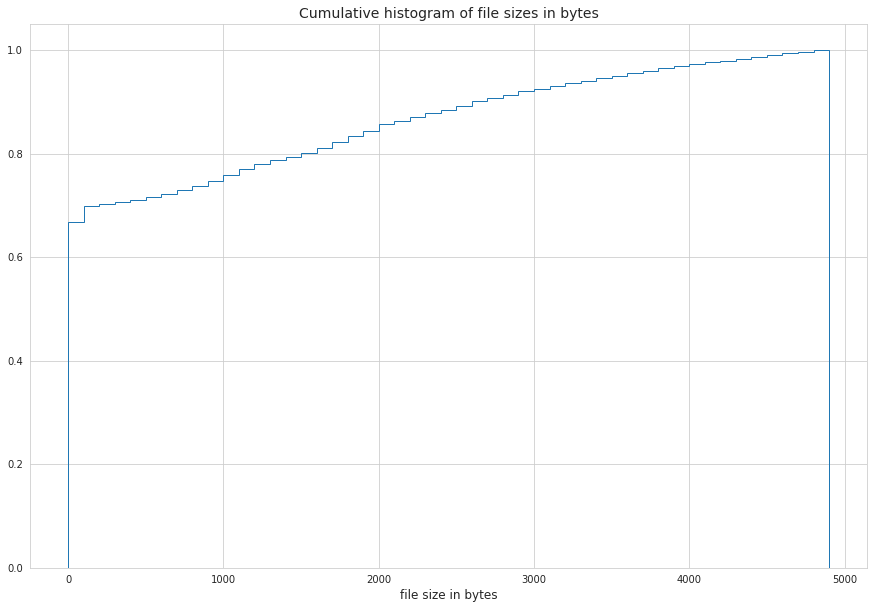

In [13]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
n, bins, patches = ax3.hist(s, bins=np.arange(0,5000, 100), density=True, histtype='step',cumulative=True, label='Empirical')
ax3.set_title('Cumulative histogram of file sizes in bytes', fontsize=14)
ax3.set_xlabel('file size in bytes', fontsize=12)

Text(0.5,0,'file size in bytes')

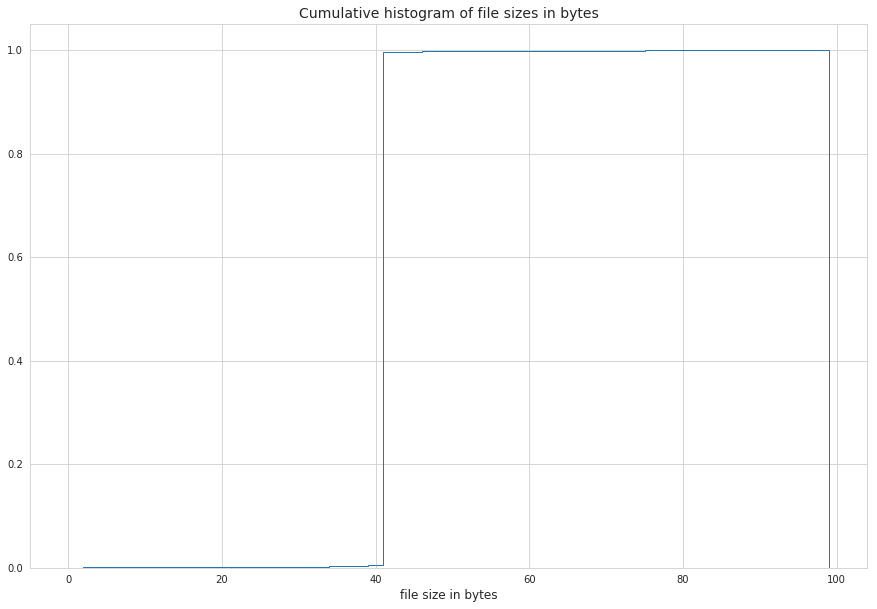

In [14]:
fig4, ax4 = plt.subplots(figsize=(15, 10))
n, bins, patches = ax4.hist(s, bins=np.arange(0,100), density=True, histtype='step',cumulative=True, label='Empirical')
ax4.set_title('Cumulative histogram of file sizes in bytes', fontsize=14)
ax4.set_xlabel('file size in bytes', fontsize=12)

In [15]:
len(s[s==41])

2387192

In [16]:
count = 0
toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
for dirName, subdirList, fileList in os.walk(toppath):
    if count > 10:
        break
    for f in fileList:
        full = os.path.join(dirName, f)
        if not os.path.islink(full):
            if os.stat(full).st_size == 41:
                print(full)
                count=count + 1
                

/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/HEAD
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/ORIG_HEAD
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/heads/master
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/10
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/2
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/11
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/3
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/12
/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/PARAM/TMVAWeights/head/.git/refs/remotes/origin/merge-requests/5
/cvm

Many small files seem to be coming from the .git directories

# Checking the number of files in the .git directories

In [17]:
import os
toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
filesizes_nogit=[]
for dirName, subdirList, fileList in os.walk(toppath):
    subdirList[:] = [d for d in subdirList if d != '.git']
    for f in fileList:
        full = os.path.join(dirName, f)
        if not os.path.islink(full):
            size = os.stat(full).st_size
            if size > 0:
                filesizes_nogit.append(size)
print("Total number of files without counting the git subdirectories: %s" % len(filesizes_nogit))

Total number of files without counting the git subdirectories: 2054327


In [18]:
s_nogit = np.array(filesizes_nogit)
sk_nogit = s_nogit/1024.0 # Size in KiB
import scipy.stats
print(scipy.stats.describe(sk_nogit))
print("The median is %s KiB" % np.median(sk_nogit))

DescribeResult(nobs=2054327, minmax=(0.0009765625, 209606.8046875), mean=140.39083882648978, variance=5873873.086522301, skewness=41.8884600862249, kurtosis=2424.6416894252634)
The median is 3.9931640625 KiB


Text(0.5,0,'file size in bytes')

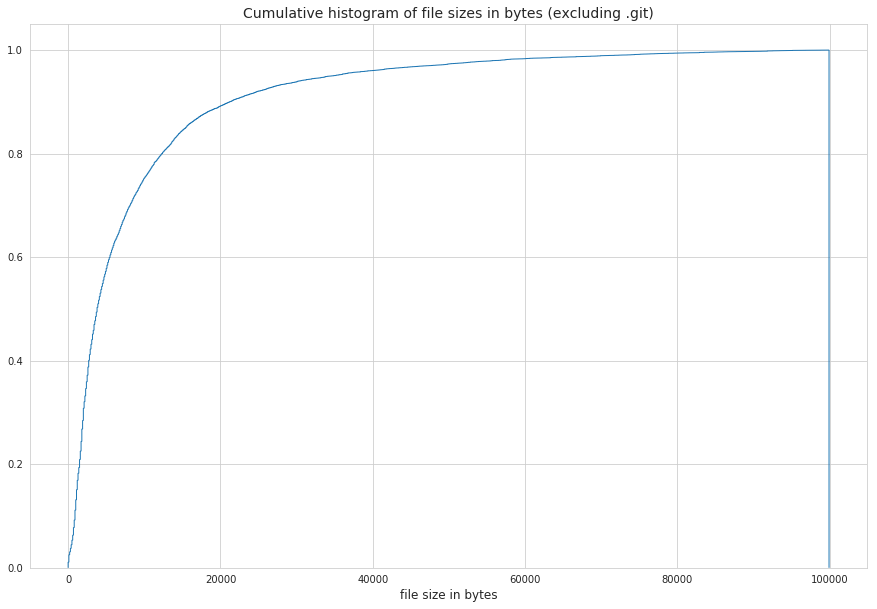

In [19]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
n, bins, patches = ax3.hist(s_nogit, bins=np.arange(0,100000, 100), density=True, histtype='step',cumulative=True, label='Empirical')
ax3.set_title('Cumulative histogram of file sizes in bytes (excluding .git)', fontsize=14)
ax3.set_xlabel('file size in bytes', fontsize=12)

Text(0.5,0,'file size in bytes')

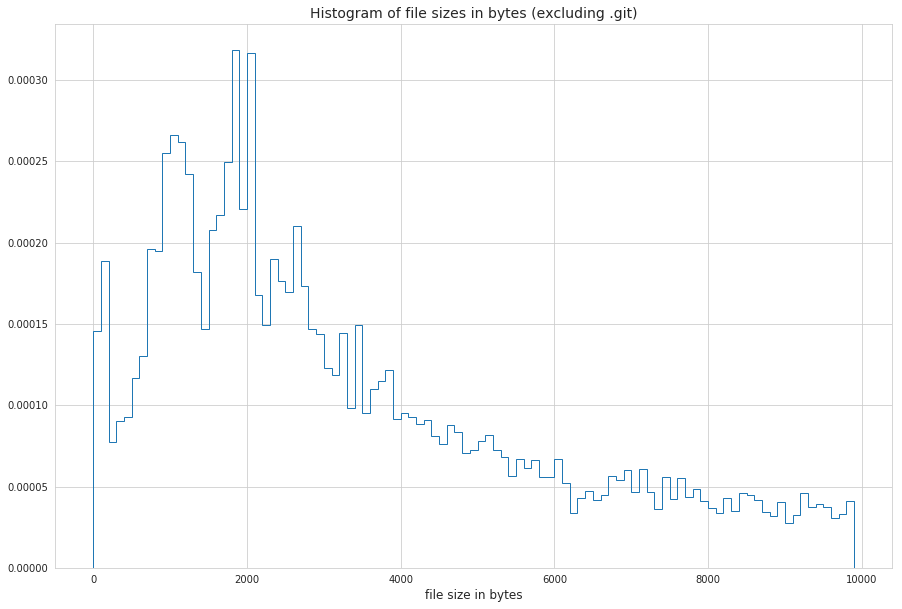

In [58]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
n, bins, patches = ax3.hist(s_nogit, bins=np.arange(0,10000, 100), density=True, histtype='step',cumulative=False, label='Empirical')
ax3.set_title('Histogram of file sizes in bytes (excluding .git)', fontsize=14)
ax3.set_xlabel('file size in bytes', fontsize=12)

# Double checks

In [21]:
import os
toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
toanalyze = set()
for dirName, subdirList, fileList in os.walk(toppath):
    if '.git' in subdirList:
        toanalyze.add(os.path.join(dirName, '.git'))
    subdirList[:] = [d for d in subdirList if d != '.git']


In [22]:
totalgit = 0
from collections import defaultdict
totalperdir = defaultdict(int)
for d in toanalyze:
    for dirName, subdirList, fileList in os.walk(d):
        for f in fileList:
            full = os.path.join(dirName, f)
            if not os.path.islink(full):
                size = os.stat(full).st_size
                if size > 0:
                    totalgit+=1
                    totalperdir[d]=totalperdir[d]+1
                

In [23]:
print("All files including git subdirs: %s" % len(filesizes))
print("All files excluding git subdirs: %s" % len(filesizes_nogit))
print("Double check: files in git subdirs: %s (i.e. %2.2f %% of total)" 
      % (totalgit, float(totalgit) / len(filesizes) * 100.0))
print("Total: %s " % (len(filesizes_nogit) + totalgit))

All files including git subdirs: 4535694
All files excluding git subdirs: 2054327
Double check: files in git subdirs: 2481367 (i.e. 54.71 % of total)
Total: 4535694 


In [24]:
from pprint import pprint
#pprint(totalperdir)
print("Nuber of .git: %s" % len(totalperdir))
avg = float(totalgit)/len(totalperdir)
print("Average number of files/.git: %s" % avg)
pprint({k: v for k, v in totalperdir.items() if v > 2 * avg})

Nuber of .git: 261
Average number of files/.git: 9507.1532567
{'/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/LHCb/.git': 21583,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2286/Rec/.git': 19511,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2287/LHCb/.git': 21604,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2287/Rec/.git': 19544,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2288/LHCb/.git': 21657,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2288/Rec/.git': 19554,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2290/LHCb/.git': 21673,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2290/Rec/.git': 19596,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2292/LHCb/.git': 21698,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2292/Rec/.git': 19621,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2294/LHCb/.git': 21752,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head/2294/Rec/.git': 19660,
 '/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaud

# LHCb Nightly slot without .git statistics

Same checks as before, ignoring the .git subdirectories

# Other checks

In [25]:
#import os
#from collections import defaultdict
#toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
#names = defaultdict(int)
#for dirName, subdirList, fileList in os.walk(toppath):
#    for f in fileList:
#        full = os.path.join(dirName, f)
#        if not os.path.islink(full):
#            if os.stat(full).st_size < 5:
#                names[f] = names[f]+1
                
#from pprint import pprint
#pprint(names)

KeyboardInterrupt: 